# Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

Se debe:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamantes = sns.load_dataset('diamonds')
diamantes.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamantes.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
diamantes.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

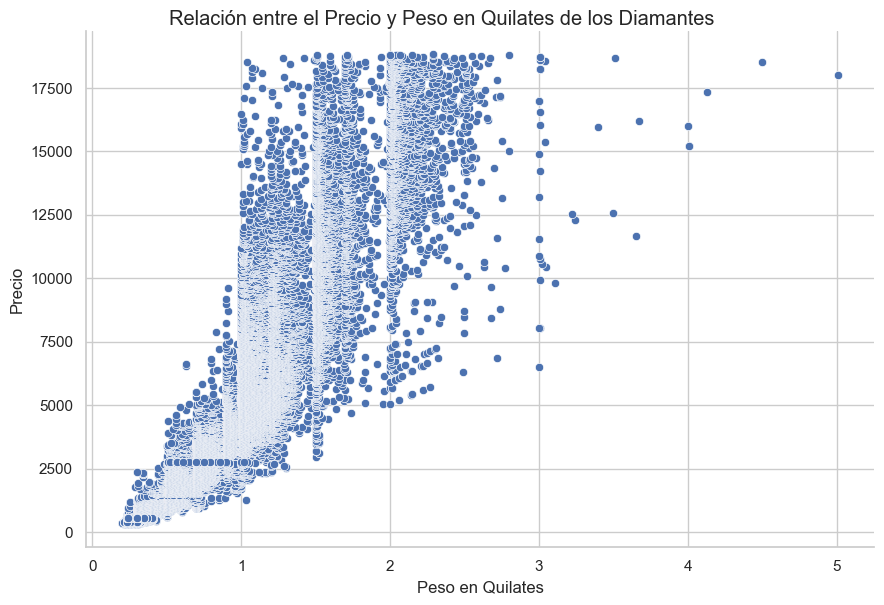

In [5]:
# Estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de relación (precio vs. peso en quilates)
g = sns.relplot(data=diamantes,
               x="carat",
               y="price",
               kind="scatter",
               height=6,
               aspect=1.5)

# Título
g.fig.suptitle('Relación entre el Precio y Peso en Quilates de los Diamantes',
              va='baseline',
              ha='center')

# Títulos de los ejes
g.set_axis_labels('Peso en Quilates', 'Precio');

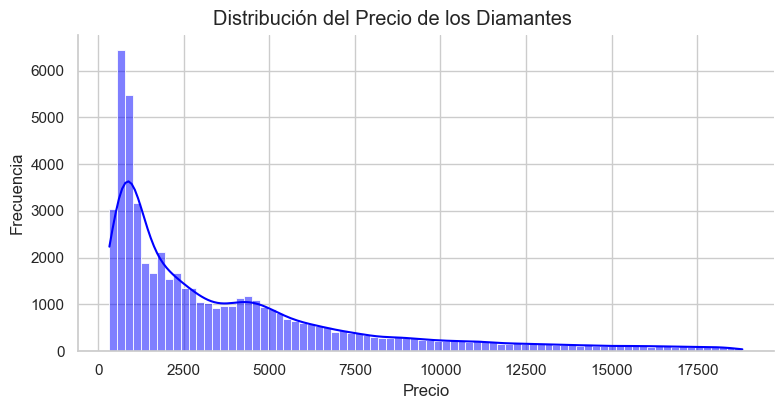

In [6]:
# Distribución del precio
g = sns.displot(data=diamantes,
               x="price",
               kind="hist",
               kde=True,
               color='blue', 
               height=4,
               aspect=2)

# Título
g.fig.suptitle('Distribución del Precio de los Diamantes',
              va='baseline',
              ha='center')

# Títulos de los ejes
g.set_axis_labels('Precio', 'Frecuencia');

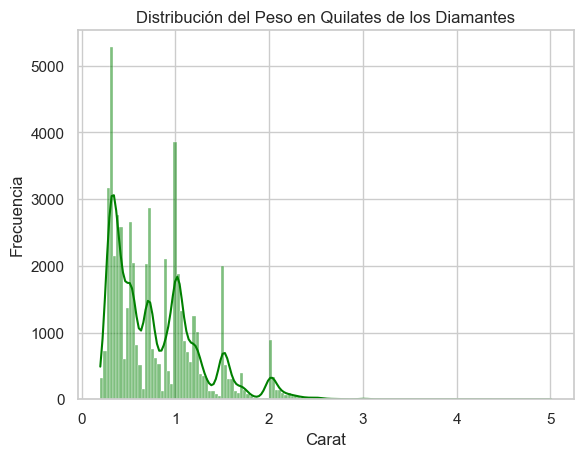

In [7]:
# Distribución del peso en quilates
g = sns.histplot(data=diamantes,
               x="carat",
               kde=True,
               color='green')

# Título
g.set_title('Distribución del Peso en Quilates de los Diamantes',
              va='baseline',
              ha='center')

# Títulos de los ejes
g.set(xlabel='Carat', ylabel='Frecuencia');

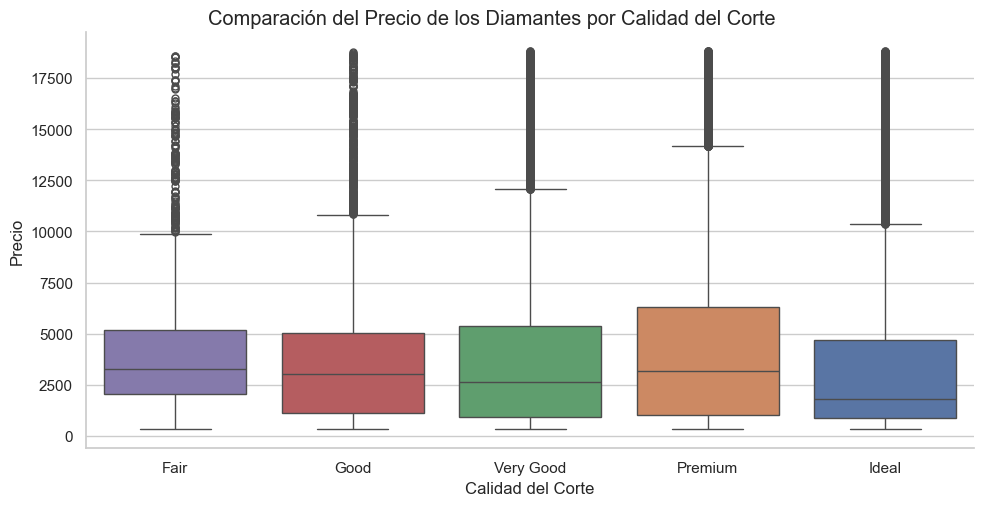

In [8]:
# Comparaciones de variables numéricas agrupadas por categorías (calidad del corte)
g = sns.catplot(data=diamantes,
               kind='box',
               x="cut",
               y='price',
               height=5,
               aspect=2,
               hue="cut",
               order=["Fair", "Good", "Very Good", "Premium", "Ideal"])

# Título
g.fig.suptitle('Comparación del Precio de los Diamantes por Calidad del Corte',
              va='baseline',
              ha='center')

# Títulos de los ejes
g.set_axis_labels('Calidad del Corte', 'Precio');

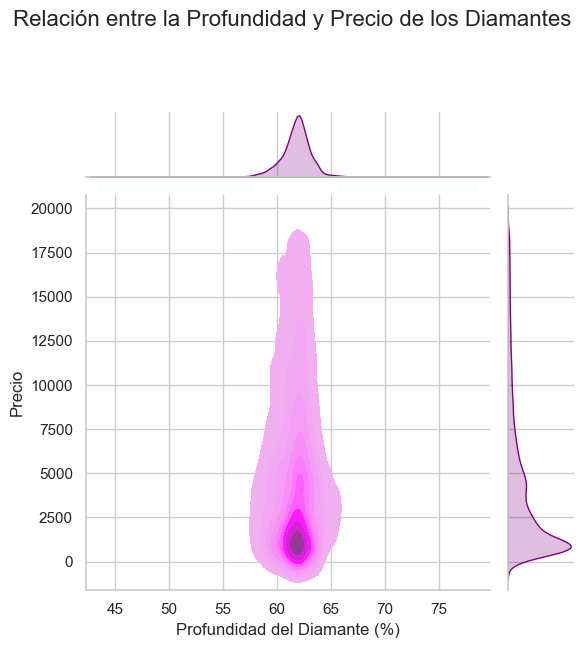

In [9]:
# Utilizar `jointplot()` para explorar la relación entre 'depth' y 'price' con un gráfico de densidad 
g = sns.jointplot(data=diamantes,
                  x="depth",
                  y="price",
                  kind="kde",
                  fill=True,
                  space=0,
                  color="purple")

# Etiquetas de los ejes
g.set_axis_labels("Profundidad del Diamante (%)", "Precio")

# Título con ajuste de posición
g.fig.suptitle('Relación entre la Profundidad y Precio de los Diamantes',
               va='baseline',
               ha='center',
               fontsize=16,
               y=1.05) 

plt.tight_layout();


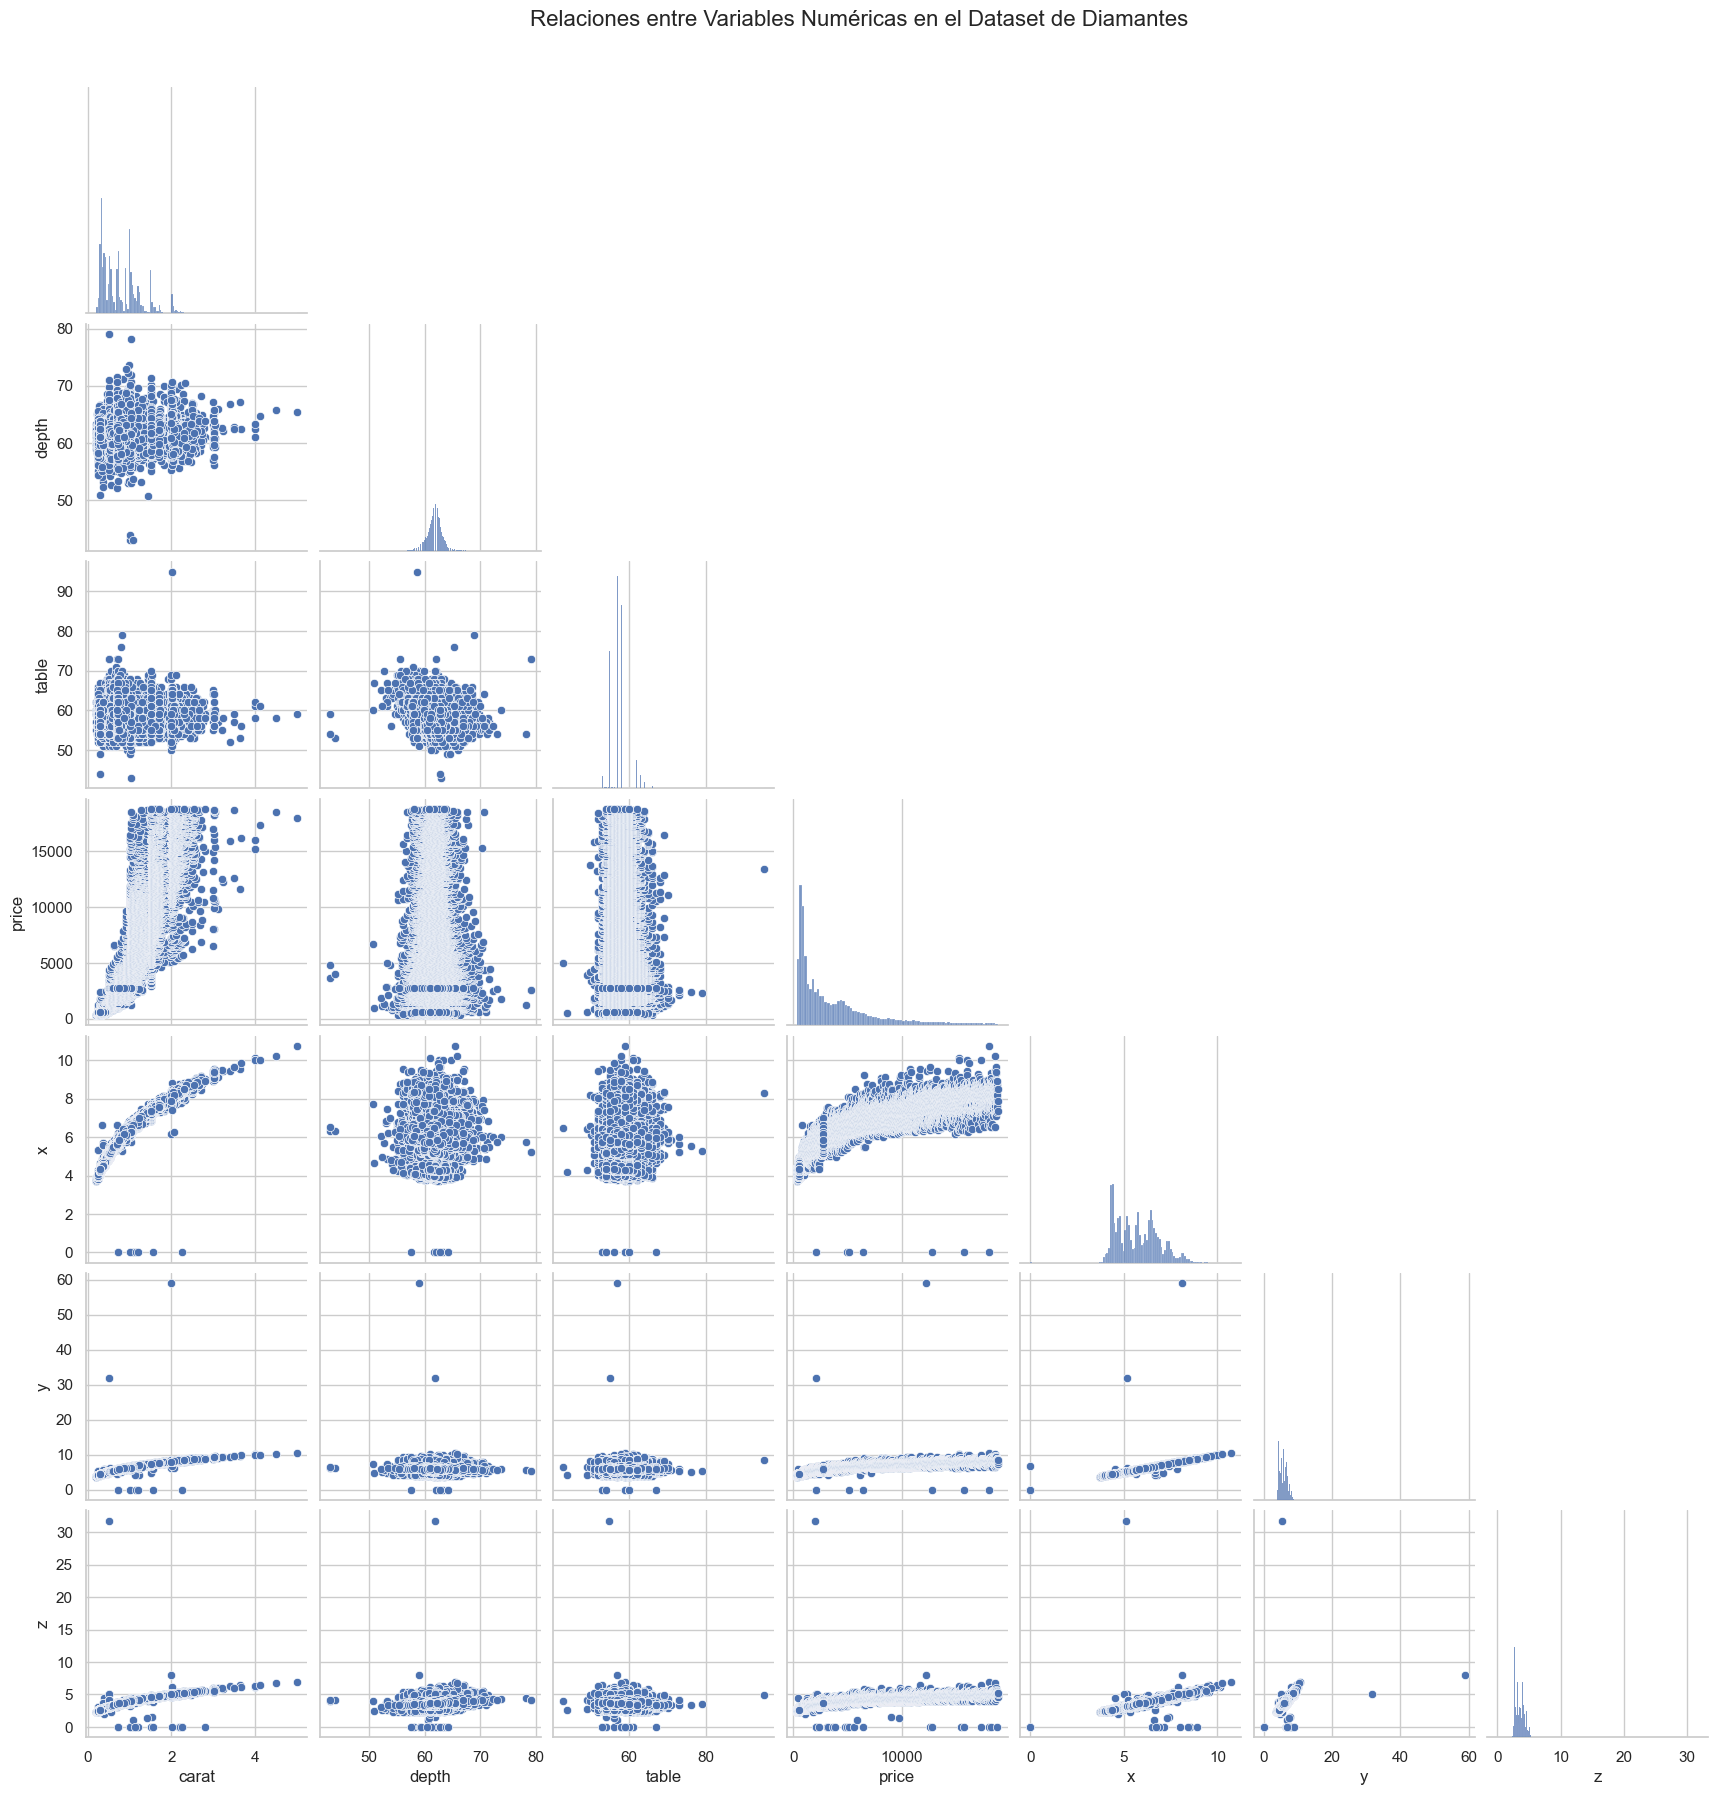

In [12]:
# Pairplot() para visualizar las relaciones entre todas las variables numéricas del dataset 
g = sns.pairplot(diamantes,
                corner = True)
g.fig.suptitle('Relaciones entre Variables Numéricas en el Dataset de Diamantes',
              va='baseline',
              ha='center',
              fontsize=16,
              y=1.02);
plt.show()